In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import json

In [2]:
path1 = 'data/S07-hw-dataset-01.csv'
path2 = 'data/S07-hw-dataset-02.csv'
path3 = 'data/S07-hw-dataset-03.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [3]:
def eda(df):
    '''Базовый EDA.'''
    shape = df.shape
    head = df.head()
    info = df.info()
    description = df.describe()
    nulls = np.sum(df.isnull(), axis=0)
    duplicated = np.sum(df1.duplicated())
    types = pd.DataFrame({'numeric types': df.select_dtypes(include='number').columns.shape[0], 'non-numeric types': df.select_dtypes(exclude='number').columns.shape[0]}, index=[0])

    result = {'shape': shape, 'head': head, 'info': info, 'description': description, 'nulls': nulls, 'duplicated': duplicated, 'types': types}

    return result

def show_eda(df):
    '''Вывод EDA.'''
    eda_df = eda(df)
    print('\nshape:', eda_df['shape'], end='\n\n')
    display(eda_df['head'])
    print()
    display(eda_df['description'])
    print('\nnulls')
    display(eda_df['nulls'])
    print('\nduplicated:', int(eda_df['duplicated']))
    display(eda_df['types'])

In [4]:
show_eda(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB

shape: (12000, 9)



,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745



nulls


sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64


duplicated: 0


,numeric types,non-numeric types
0,9,0


In [5]:
show_eda(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB

shape: (8000, 4)



,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076



nulls


sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64


duplicated: 0


,numeric types,non-numeric types
0,4,0


In [6]:
show_eda(df3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB

shape: (15000, 5)



,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865



nulls


sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64


duplicated: 0


,numeric types,non-numeric types
0,5,0


Все три датасета не содержат пропусков и дубликатов. Также все признаки в них являются числовыми, то есть категориальные признаки отсутствуют.

In [7]:
def get_X(df):
    '''Разделение датасета на sample_id и на X.'''
    return df['sample_id'], df.drop('sample_id', axis=1)

In [8]:
sample_id1, X1 = get_X(df1)
sample_id2, X2 = get_X(df2)
sample_id3, X3 = get_X(df3)

In [9]:
def preprocessing(X):
    '''Масштабирование признаков.'''
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [10]:
X1_scaled = preprocessing(X1)
X2_scaled = preprocessing(X2)
X3_scaled = preprocessing(X3)

In [56]:
def compute_metrics(X, labels, random_state):
    '''Расчет метрик.'''
    try:
        silh = float(silhouette_score(X, labels, random_state=random_state))
    except Exception:
        silh = None
        
    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try: 
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None
        
    return {'silhouette': silh, 'davies_bouldin': db, 'calinski_harabasz': ch}


def KMeans_grid(X, ks, n_init, random_state, df_path):
    '''KMeans кластеризация с различными k.'''
    results = []
    for k in ks:
        model = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        labels = model.fit_predict(X)
        metrics = compute_metrics(X, labels, random_state)
        results.append({
            'algo': 'k_means',
            'data': df_path,
            'params': {'n_clusters': int(k), 'n_init': int(n_init)},
            'labels': labels,
            'metrics': metrics,
            'inertia': float(model.inertia_),
            'n_clusters': int(len(np.unique(labels))),
            'noise_frac': 0.0,
            'random_state': int(random_state)
        })
    return results


def DBSCAN_grid(X, eps, min_samples, random_state, df_path):
    '''DBSCAN кластеризация с различными eps и min_samples.'''
    results = []
    for ep in eps:
        for n_samp in min_samples:
            model = DBSCAN(eps=float(ep), min_samples=int(n_samp), n_jobs=-1)
            labels = model.fit_predict(X)
            mask = labels != -1
            X_nn = X[mask]
            labels_nn = labels[mask]
            noise_frac = float(np.mean(labels == -1))
            metrics = compute_metrics(X_nn, labels_nn, random_state)
            results.append({
                'algo': 'dbscan',
                'data': df_path,
                'params': {'eps': float(ep), 'min_samples': float(n_samp)},
                'labels': labels,
                'metrics': metrics,
                'intertia': None,
                'n_clusters': len(np.unique(labels_nn)),
                'noise_frac': noise_frac,
                'random_state': random_state
            })
    return results


def Agglomerative_grid(X, ks, linkages, random_state, df_path):
    '''Агломеративная иерархическая кластеризация с различными eps и min_samples.'''
    results = []
    for k in ks:
        for link in linkages:
            model = AgglomerativeClustering(n_clusters=k, linkage=link)
            labels = model.fit_predict(X)
            metrics = compute_metrics(X, labels, random_state)
            results.append({
                'algo': 'agglomerative',
                'data': df_path,
                'params': {'n_clusters': int(k), 'linkage': link},
                'labels': labels,
                'metrics': metrics,
                'intertia': None,
                'n_clusters': len(np.unique(labels)),
                'noise_frac': 0.0,
                'random_state': random_state
            })
    return results


def plot_pca_and_tsne(X, best):
    '''Визуализация кластеров с помощью pca и tsne.'''

    path = best['data']

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    tsne = TSNE(n_components=2, perplexity=15, learning_rate='auto', max_iter=500, random_state=42, n_jobs=-1)
    X_tsne = tsne.fit_transform(X)

    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle(f'PCA and t-SNE visualization for {best['data']}', fontsize=16, y=1.02)

    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=best['labels'])
    axes[0].set_title(f'PCA 2D for {best['algo']} clustering, params: {best['params']}')
    axes[0].set_xlabel('feature 1')
    axes[0].set_ylabel('feature 2')
    axes[0].grid(True)

    axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=best['labels'])
    axes[1].set_title(f't-SNE 2D for {best['algo']} clustering, params: {best['params']}')
    axes[1].set_xlabel('feature 1')
    axes[1].set_ylabel('feature 2')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.savefig(f'artifacts/figures/pca and tsne {path[5:-3]}png')
    print(f'saved artifacts/figures/pca and tsne {path[5:-3]}png')
    plt.show()


def plot_kmeans_metrics_vs_k(results):
    '''Визуализация метрик для KMeans кластеризации.'''

    ks = [results[i]['params']['n_clusters'] for i in range(len(results))]
    inertias = [results[i]['inertia'] for i in range(len(results))]
    sils = [results[i]['metrics']['silhouette'] for i in range(len(results))]
    db = [results[i]['metrics']['davies_bouldin'] for i in range(len(results))]
    ch = [results[i]['metrics']['calinski_harabasz'] for i in range(len(results))]
    path = results[0]['data']

    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    fig.suptitle('KMeans Clustering Metrics', fontsize=16, y=1.02)
    
    axes[0].plot(ks, inertias, marker='o')
    axes[0].set_title('KMeans: inertias vs k')
    axes[0].set_xlabel('k')
    axes[0].set_ylabel('inertias')
    axes[0].grid(True)

    axes[1].plot(ks, sils, marker='o')
    axes[1].set_title('KMeans: silhouette vs k')
    axes[1].set_xlabel('k')
    axes[1].set_ylabel('silhouette')
    axes[1].grid(True)

    axes[2].plot(ks, db, marker='o')
    axes[2].set_title('KMeans: davies bouldin index vs k')
    axes[2].set_xlabel('k')
    axes[2].set_ylabel('davies bouldin index')
    axes[2].grid(True)

    axes[3].plot(ks, ch, marker='o')
    axes[3].set_title('KMeans: calinski harabasz score vs k')
    axes[3].set_xlabel('k')
    axes[3].set_ylabel('calinski harabasz score')
    axes[3].grid(True)

    plt.tight_layout()
    plt.savefig(f'artifacts/figures/kmeans metrics {path[5:-3]}png')
    print(f'saved artifacts/figures/kmeans metrics {path[5:-3]}png')
    plt.show()


def plot_dbscan_metrics(results):
    '''Визуализация метрик для DBSCAN кластеризации.'''
    
    n_clusters = [results[i]['n_clusters'] for i in range(len(results))]
    sils = [results[i]['metrics']['silhouette'] for i in range(len(results))]
    db = [results[i]['metrics']['davies_bouldin'] for i in range(len(results))]
    ch = [results[i]['metrics']['calinski_harabasz'] for i in range(len(results))]
    path = results[0]['data']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{results[0]['algo']} Clustering Metrics', fontsize=16, y=1.02)

    axes[0].plot(n_clusters, sils, marker='o')
    axes[0].set_title(f'{results[0]['algo']}: silhouette vs k')
    axes[0].set_xlabel('k')
    axes[0].set_ylabel('silhouette')
    axes[0].grid(True)

    axes[1].plot(n_clusters, db, marker='o')
    axes[1].set_title(f'{results[0]['algo']}: davies bouldin index vs k')
    axes[1].set_xlabel('k')
    axes[1].set_ylabel('davies bouldin index')
    axes[1].grid(True)

    axes[2].plot(n_clusters, ch, marker='o')
    axes[2].set_title(f'{results[0]['algo']}: calinski harabasz score vs k')
    axes[2].set_xlabel('k')
    axes[2].set_ylabel('calinski harabasz score')
    axes[2].grid(True)

    plt.tight_layout()
    plt.savefig(f'artifacts/figures/{results[0]['algo']} metrics {path[5:-3]}png')
    print(f'saved artifacts/figures/{results[0]['algo']} metrics {path[5:-3]}png')
    plt.show()


def plot_agglom_metrics(results):
    '''Визуализация метрик для Agglomerative кластеризации.'''
    
    path = results[0]['data']

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle(f'{results[0]['algo']} Clustering Metrics', fontsize=16, y=1.02)
    linkages = ['single', 'average', 'ward']
    
    for k in range(len(linkages)):
        
        n_clusters = [results[i]['n_clusters'] for i in range(len(results)) if results[i]['params']['linkage'] == linkages[k]]
        sils = [results[i]['metrics']['silhouette'] for i in range(len(results)) if results[i]['params']['linkage'] == linkages[k]]
        db = [results[i]['metrics']['davies_bouldin'] for i in range(len(results)) if results[i]['params']['linkage'] == linkages[k]]
        ch = [results[i]['metrics']['calinski_harabasz'] for i in range(len(results)) if results[i]['params']['linkage'] == linkages[k]]
    
        axes[k, 0].plot(n_clusters, sils, marker='o')
        axes[k, 0].set_title(f'{results[0]['algo']}: silhouette vs k, linkage: {linkages[k]}')
        axes[k, 0].set_xlabel('k')
        axes[k, 0].set_ylabel('silhouette')
        axes[k, 0].grid(True)
    
        axes[k, 1].plot(n_clusters, db, marker='o')
        axes[k, 1].set_title(f'{results[0]['algo']}: davies bouldin index vs k, linkage: {linkages[k]}')
        axes[k, 1].set_xlabel('k')
        axes[k, 1].set_ylabel('davies bouldin index')
        axes[k, 1].grid(True)
    
        axes[k, 2].plot(n_clusters, ch, marker='o')
        axes[k, 2].set_title(f'{results[0]['algo']}: calinski harabasz score vs k, linkage: {linkages[k]}')
        axes[k, 2].set_xlabel('k')
        axes[k, 2].set_ylabel('calinski harabasz score')
        axes[k, 2].grid(True)

    plt.tight_layout()
    plt.savefig(f'artifacts/figures/{results[0]['algo']} metrics {path[5:-3]}png')
    print(f'saved artifacts/figures/{results[0]['algo']} metrics {path[5:-3]}png')
    plt.show()


def save_labels(config, samples_id):
    '''Сохранение меток кластеризации.'''
    labels = pd.DataFrame({'sample_id': samples_id, 'cluster_label': config['labels']})
    path = f'artifacts/labels_hw07_ds{config['data'][-5:]}'
    labels.to_csv(path, index=False)
    print(f'saved {path}')


def save_json(data, path):
    '''Сохранение файлов json.'''
    with open(path, 'w') as doc:
        json.dump(data, doc, ensure_ascii=False, indent=2)
    print(f'saved {path}')

In [12]:
random_state = 42
n_init = 10
ks = np.arange(2, 16)
eps = np.linspace(0.1, 10, 10)
min_samples = np.arange(4, 100, 20)
linkages = ['single', 'average', 'ward']

metrics_summary = {}
best_configs = {}

In [13]:
df1_kmeans = KMeans_grid(X1_scaled, ks, n_init, random_state, path1)
df1_dbscan = DBSCAN_grid(X1_scaled, eps, min_samples, random_state, path1)
df1_agglom = Agglomerative_grid(X1_scaled, ks, linkages, random_state, path1)

In [14]:
metrics_summary[path1] =  df1_kmeans + df1_dbscan + df1_agglom
len(metrics_summary[path1])

106

saved artifacts/figures/kmeans metrics S07-hw-dataset-01.png


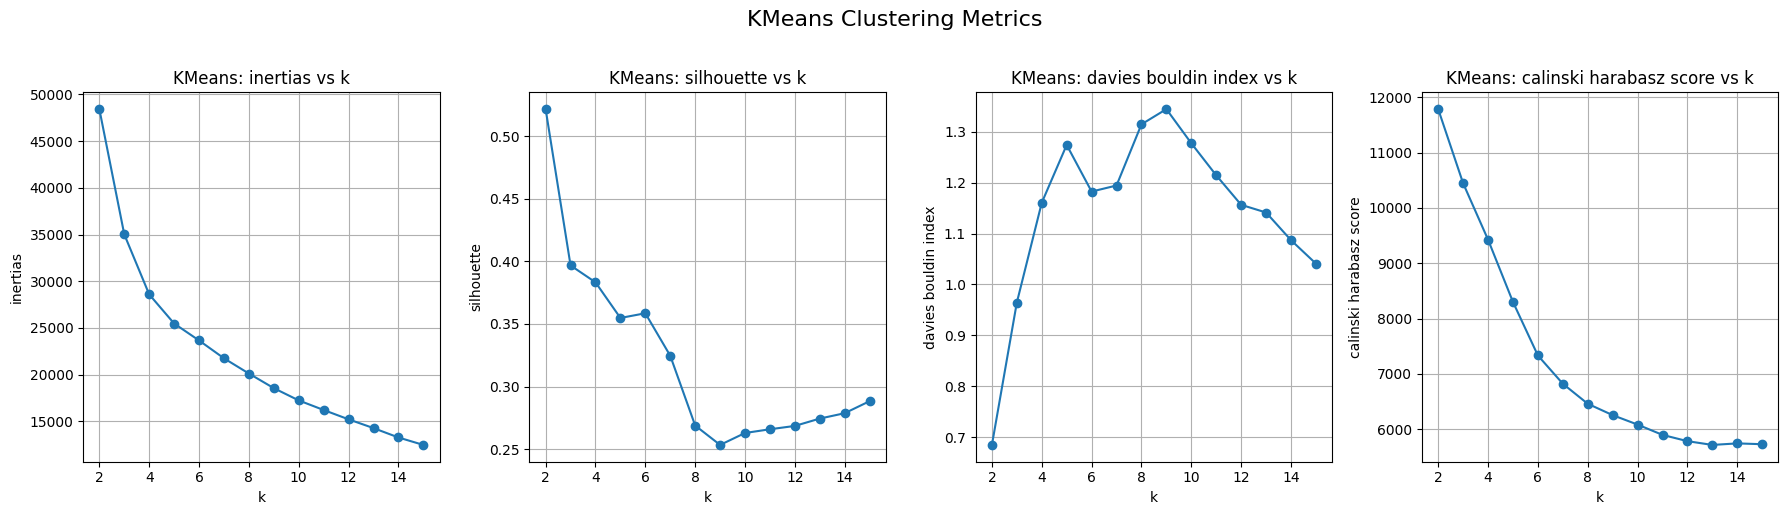

In [15]:
plot_kmeans_metrics_vs_k(df1_kmeans)

saved artifacts/figures/dbscan metrics S07-hw-dataset-01.png


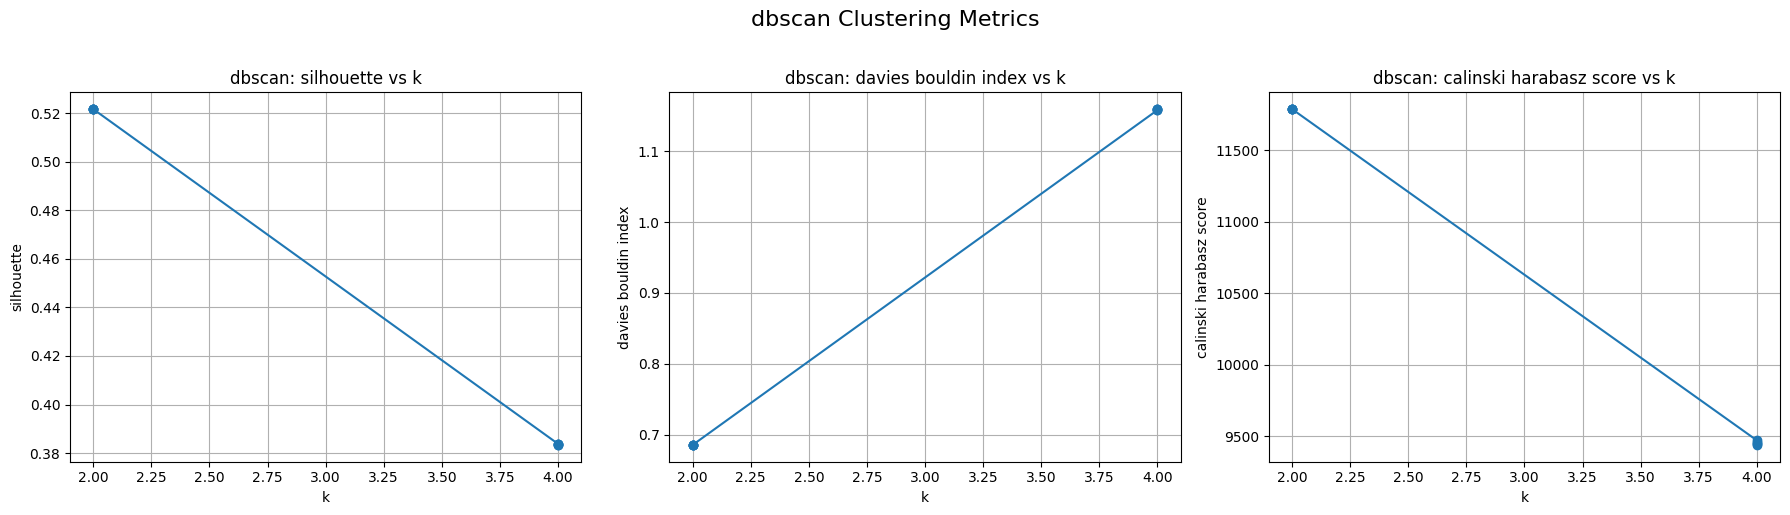

In [16]:
plot_dbscan_metrics(df1_dbscan)

saved artifacts/figures/agglomerative metrics S07-hw-dataset-01.png


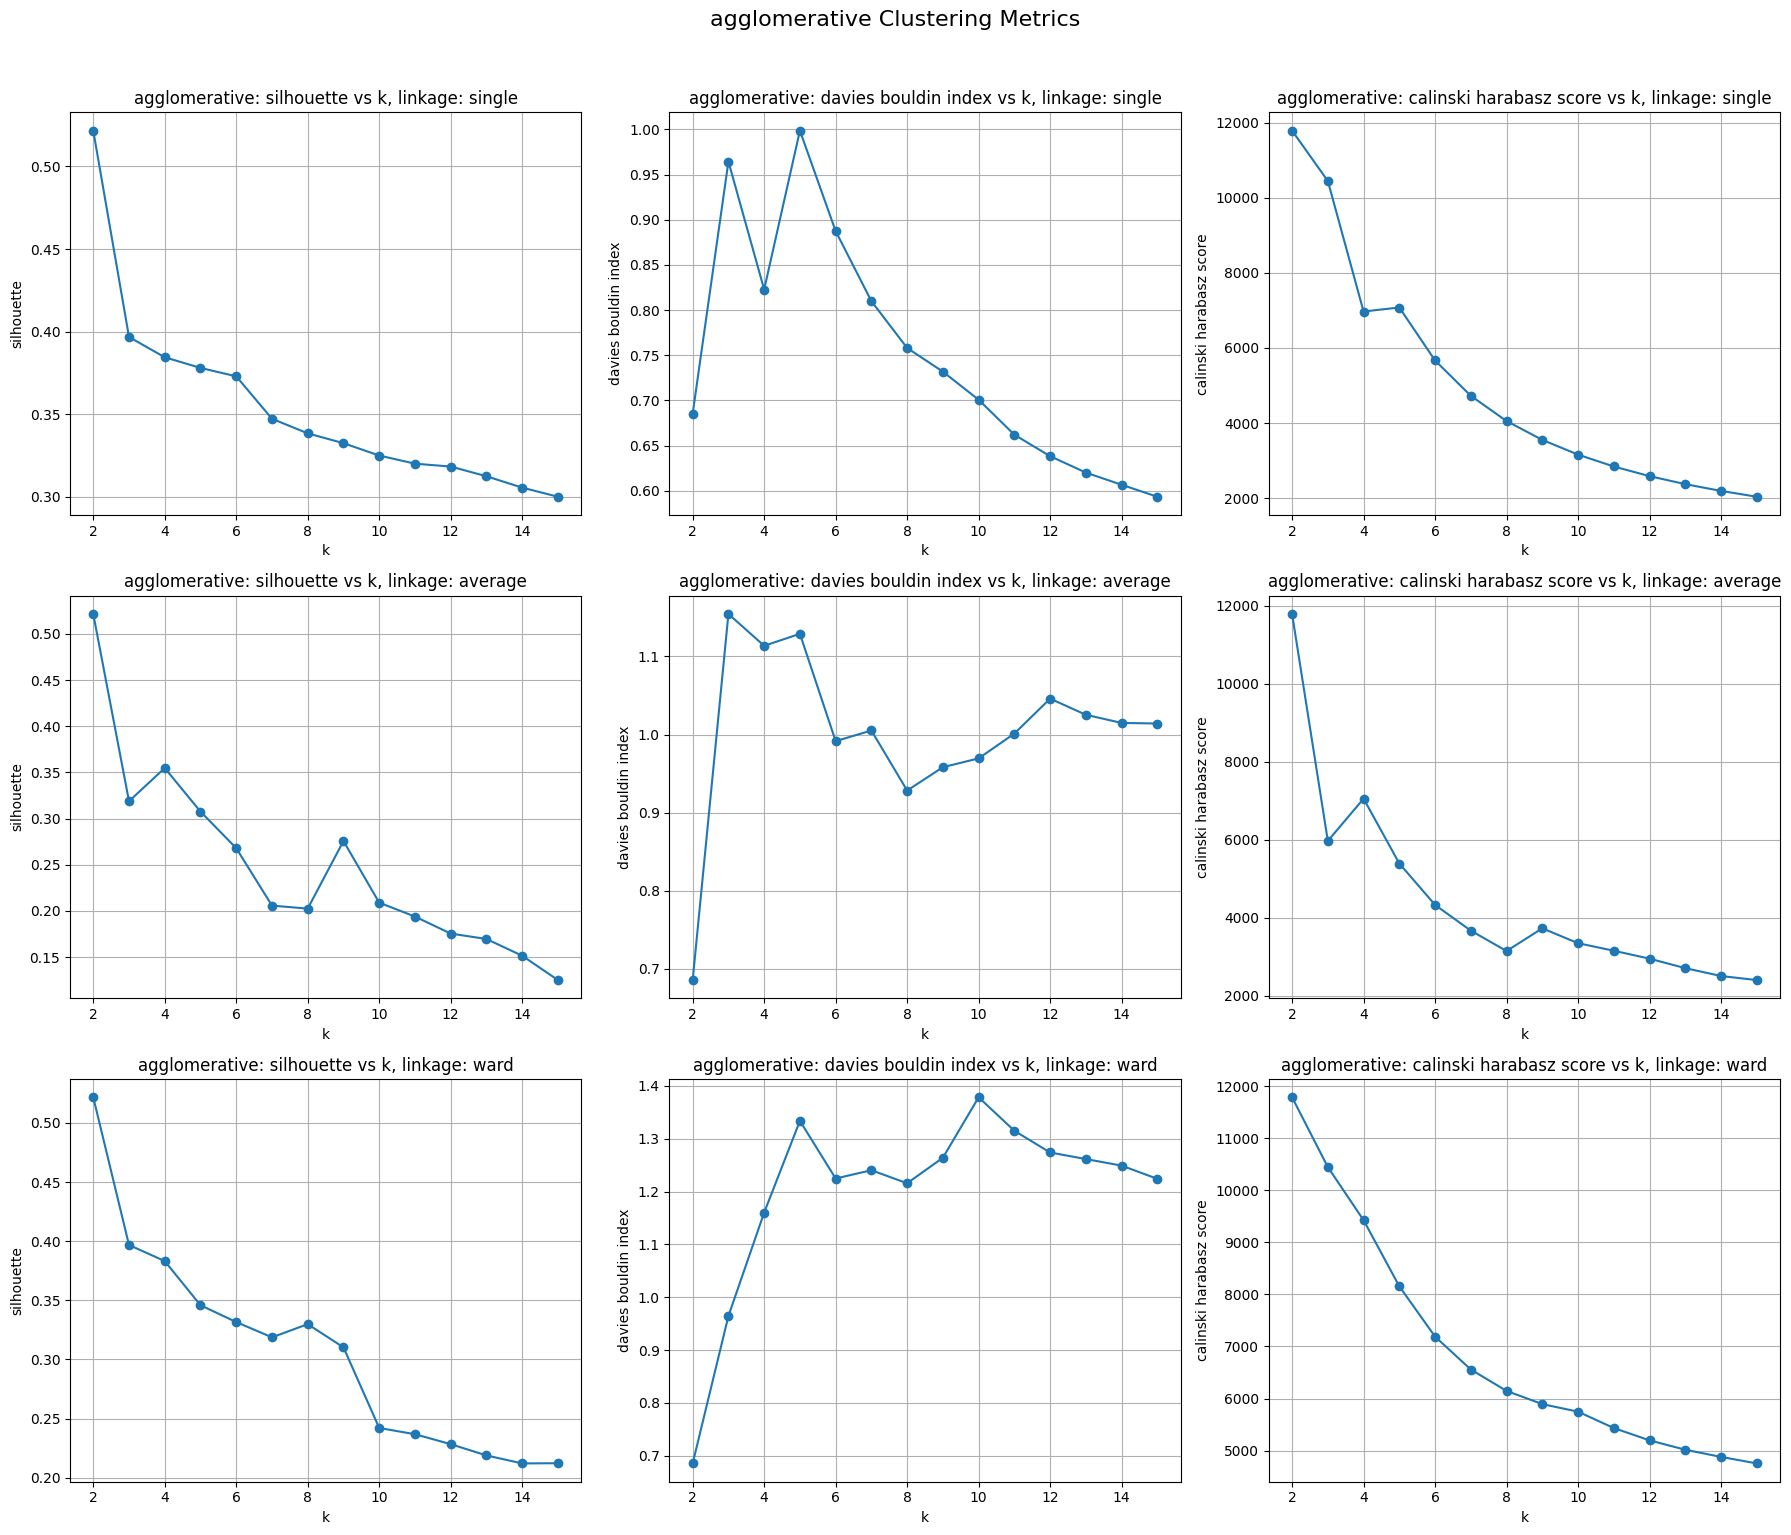

In [17]:
plot_agglom_metrics(df1_agglom)

Самые хорошие значения метрик для кластеризации объектов находятся в области двух кластеров для всех трех алгоритмов, что неудивительно. Тем не менее вряд ли такое разбиение действительно полезно, стоит взглянуть и на другие варианты, например, на три кластера, у иерархической класстеризации с разными linkage примерно похожи метрики на kmeans. Поэтому для первого датасета возьму kmeans с тремя кластерами.

In [18]:
best_configs[path1] = [x for x in df1_kmeans if x['n_clusters'] == 3][0]
best_configs[path1]

{'algo': 'k_means',
 'data': 'data/S07-hw-dataset-01.csv',
 'params': {'n_clusters': 3, 'n_init': 10},
 'labels': array([0, 1, 1, ..., 2, 1, 2], shape=(12000,), dtype=int32),
 'metrics': {'silhouette': 0.39675785208949865,
  'davies_bouldin': 0.9646042500366256,
  'calinski_harabasz': 10446.638111140073},
 'inertia': 35016.79317669647,
 'n_clusters': 3,
 'noise_frac': 0.0,
 'random_state': 42}

saved artifacts/figures/pca and tsne S07-hw-dataset-01.png


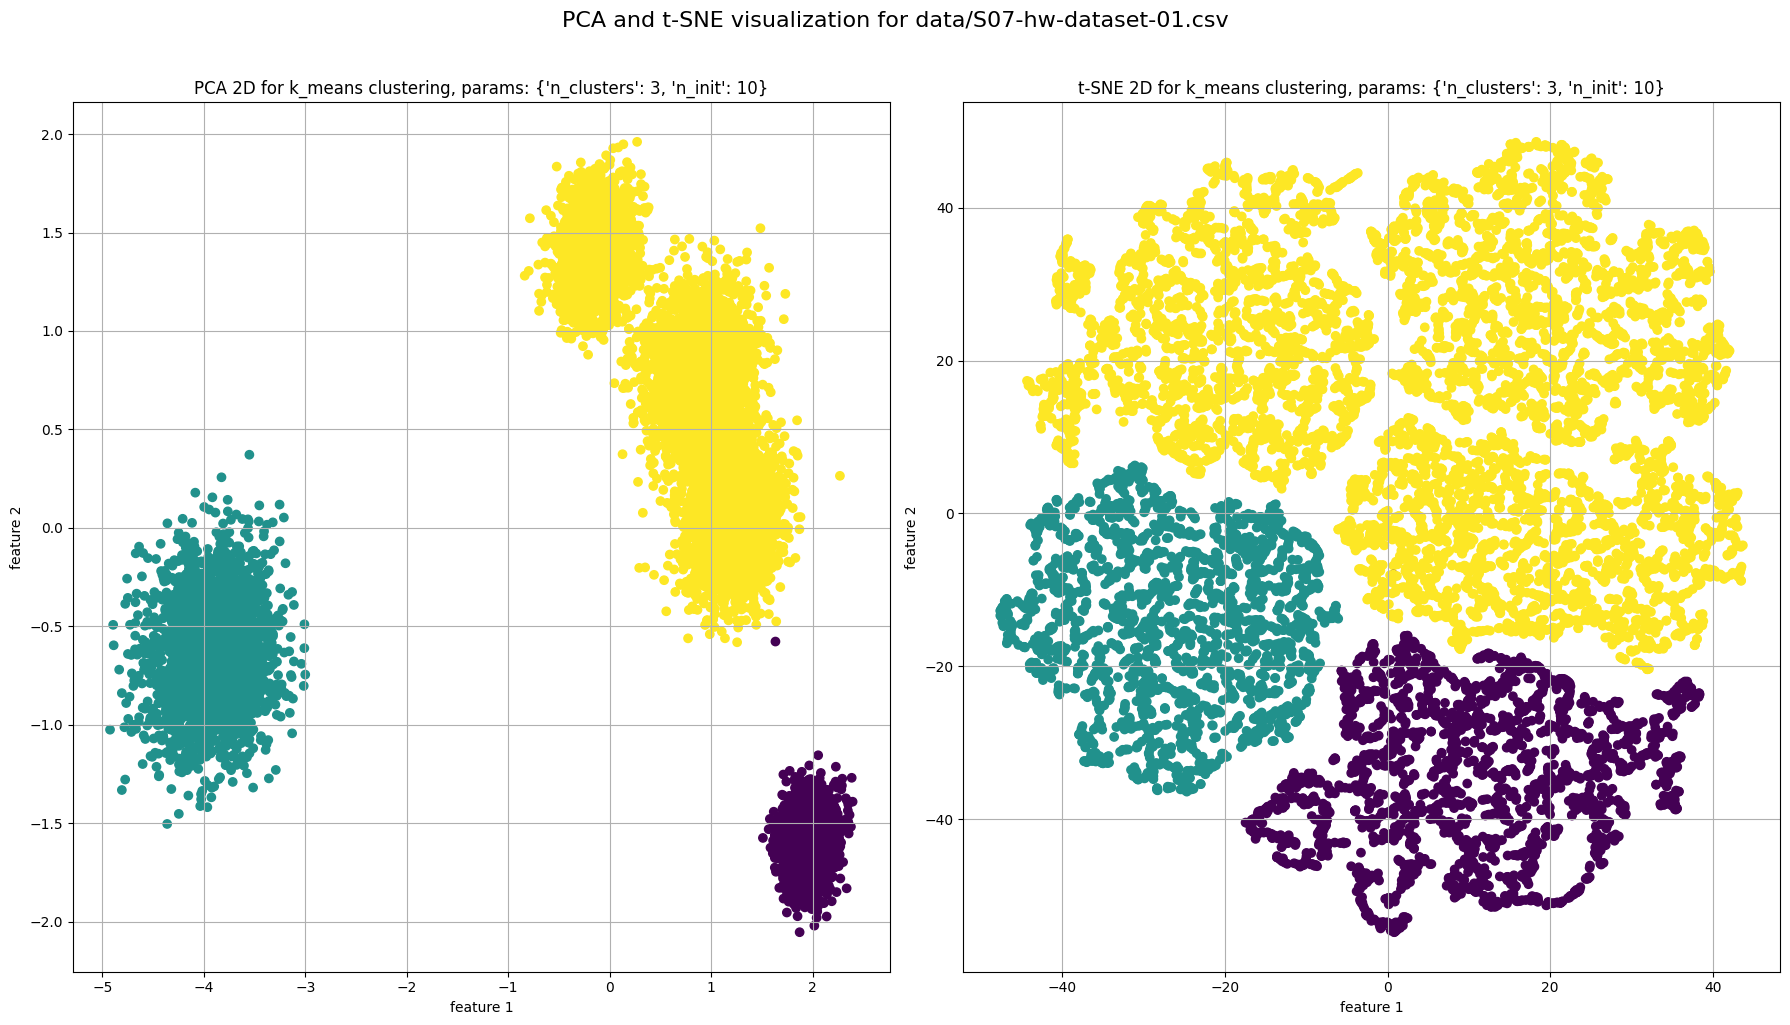

In [19]:
plot_pca_and_tsne(X1_scaled, best_configs[path1])

На графиках видно, что в данных можно выделить 5 кластеров, особенно это заметно на t-SNE графике. Но в данном случае полученные три кластера также подходят, к тому же t-SNE визуализирует лишь локальные структуры.

In [20]:
df2_kmeans = KMeans_grid(X2_scaled, ks, n_init, random_state, path2)
df2_dbscan = DBSCAN_grid(X2_scaled, eps, min_samples, random_state, path2)
df2_agglom = Agglomerative_grid(X2_scaled, ks, linkages, random_state, path2)

In [21]:
metrics_summary[path2] =  df2_kmeans + df2_dbscan + df2_agglom
len(metrics_summary[path2])

106

saved artifacts/figures/kmeans metrics S07-hw-dataset-02.png


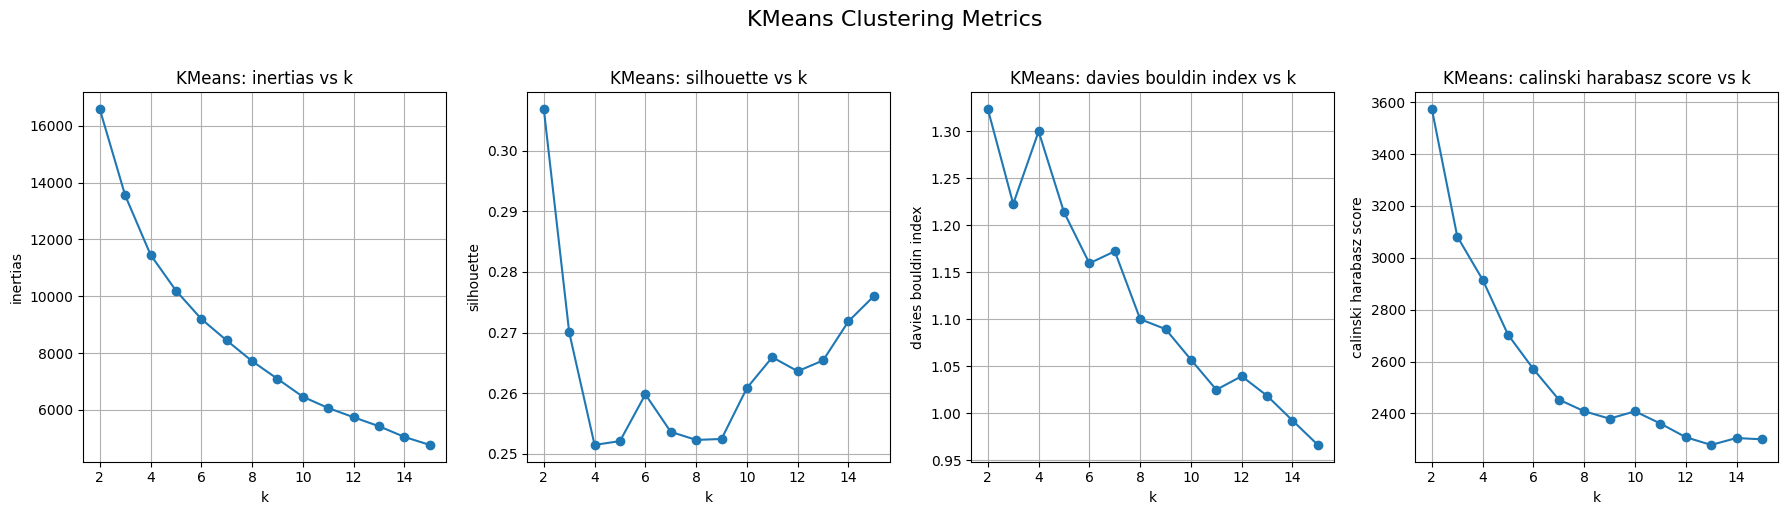

In [22]:
plot_kmeans_metrics_vs_k(df2_kmeans)

saved artifacts/figures/dbscan metrics S07-hw-dataset-02.png


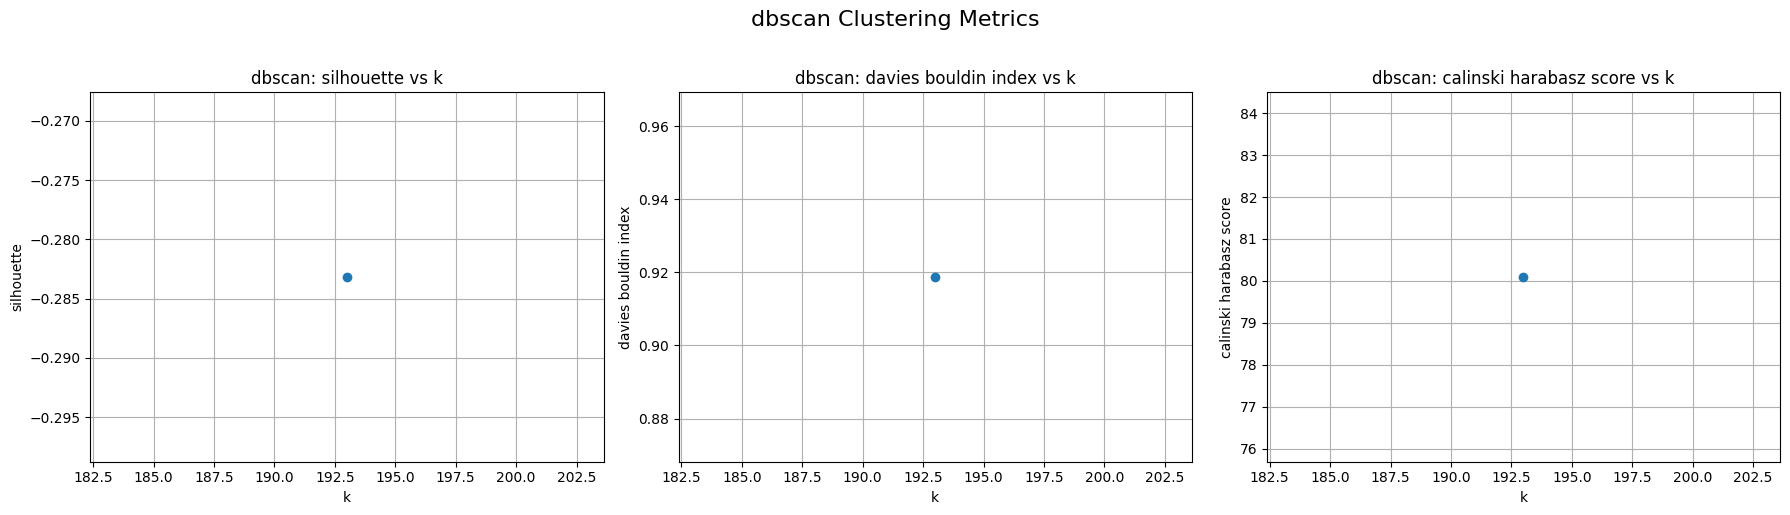

In [24]:
plot_dbscan_metrics(df2_dbscan)

saved artifacts/figures/agglomerative metrics S07-hw-dataset-02.png


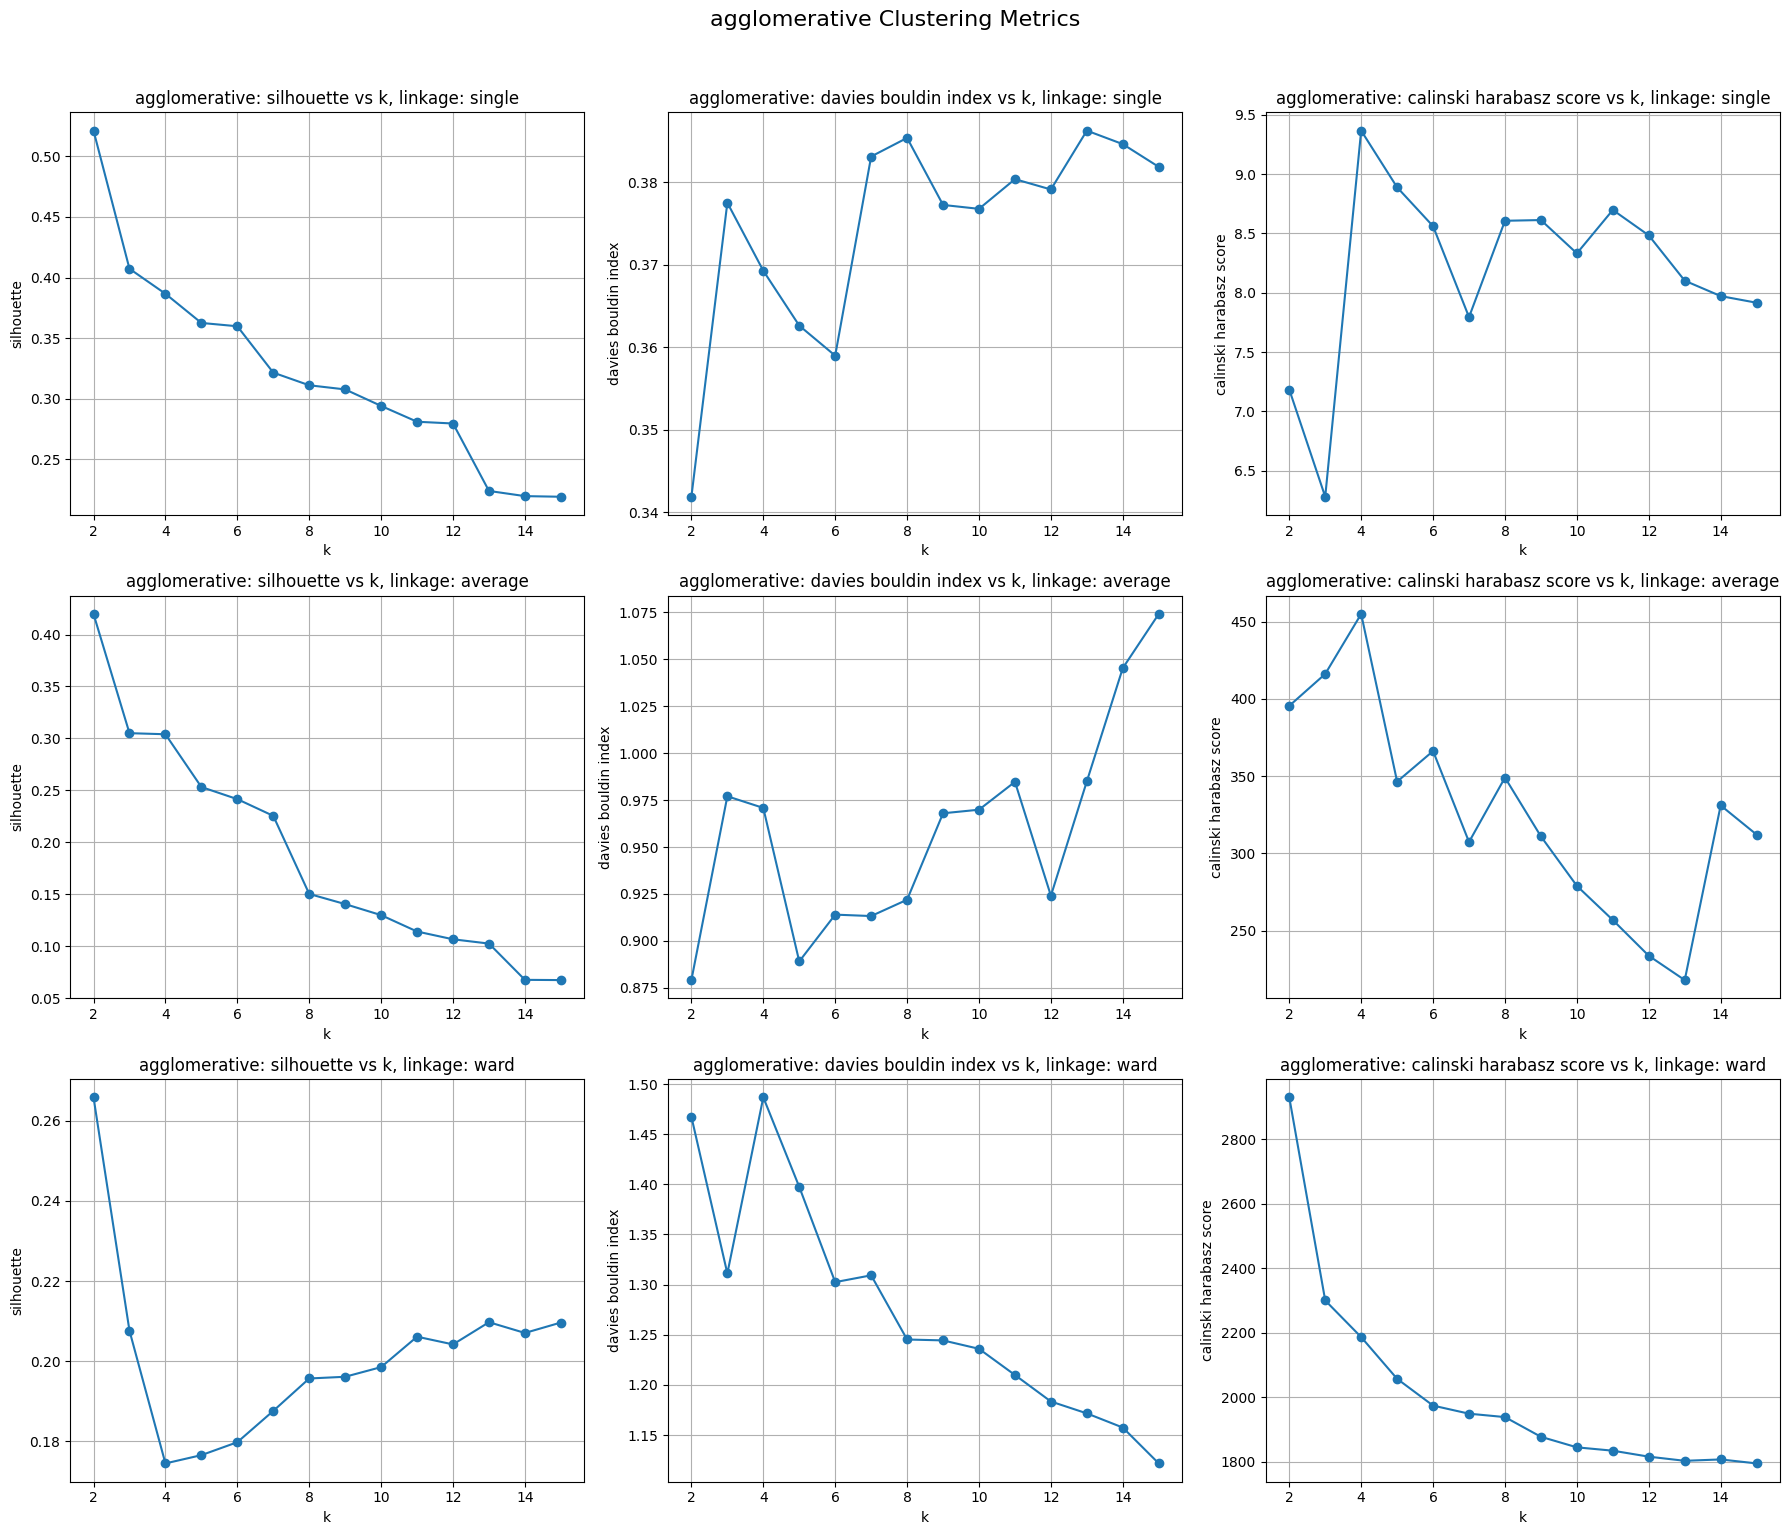

In [25]:
plot_agglom_metrics(df2_agglom)

DBSCAN с этим датасетом ведет себя еще хуже, чем с предыдущим, возможно, дело в параметрах, а может данные разной протности. Тем не менее иерархическая кластеризация показывает неплохие метрики, как и KMeans, особенно в области 2-4 кластеров. Как и в предыдущем примере, возьму три кластера, но в этот раз иерархической кластеризации с linkage = 'ward'.

In [26]:
best_configs[path2] = [x for x in df2_agglom if x['n_clusters'] == 3 and x['params']['linkage'] == 'ward'][0]
best_configs[path2]

{'algo': 'agglomerative',
 'data': 'data/S07-hw-dataset-02.csv',
 'params': {'n_clusters': 3, 'linkage': 'ward'},
 'labels': array([1, 0, 0, ..., 0, 1, 2], shape=(8000,)),
 'metrics': {'silhouette': 0.20763735890314128,
  'davies_bouldin': 1.3111375348939511,
  'calinski_harabasz': 2299.9172003357685},
 'intertia': None,
 'n_clusters': 3,
 'noise_frac': 0.0,
 'random_state': 42}

saved artifacts/figures/pca and tsne S07-hw-dataset-02.png


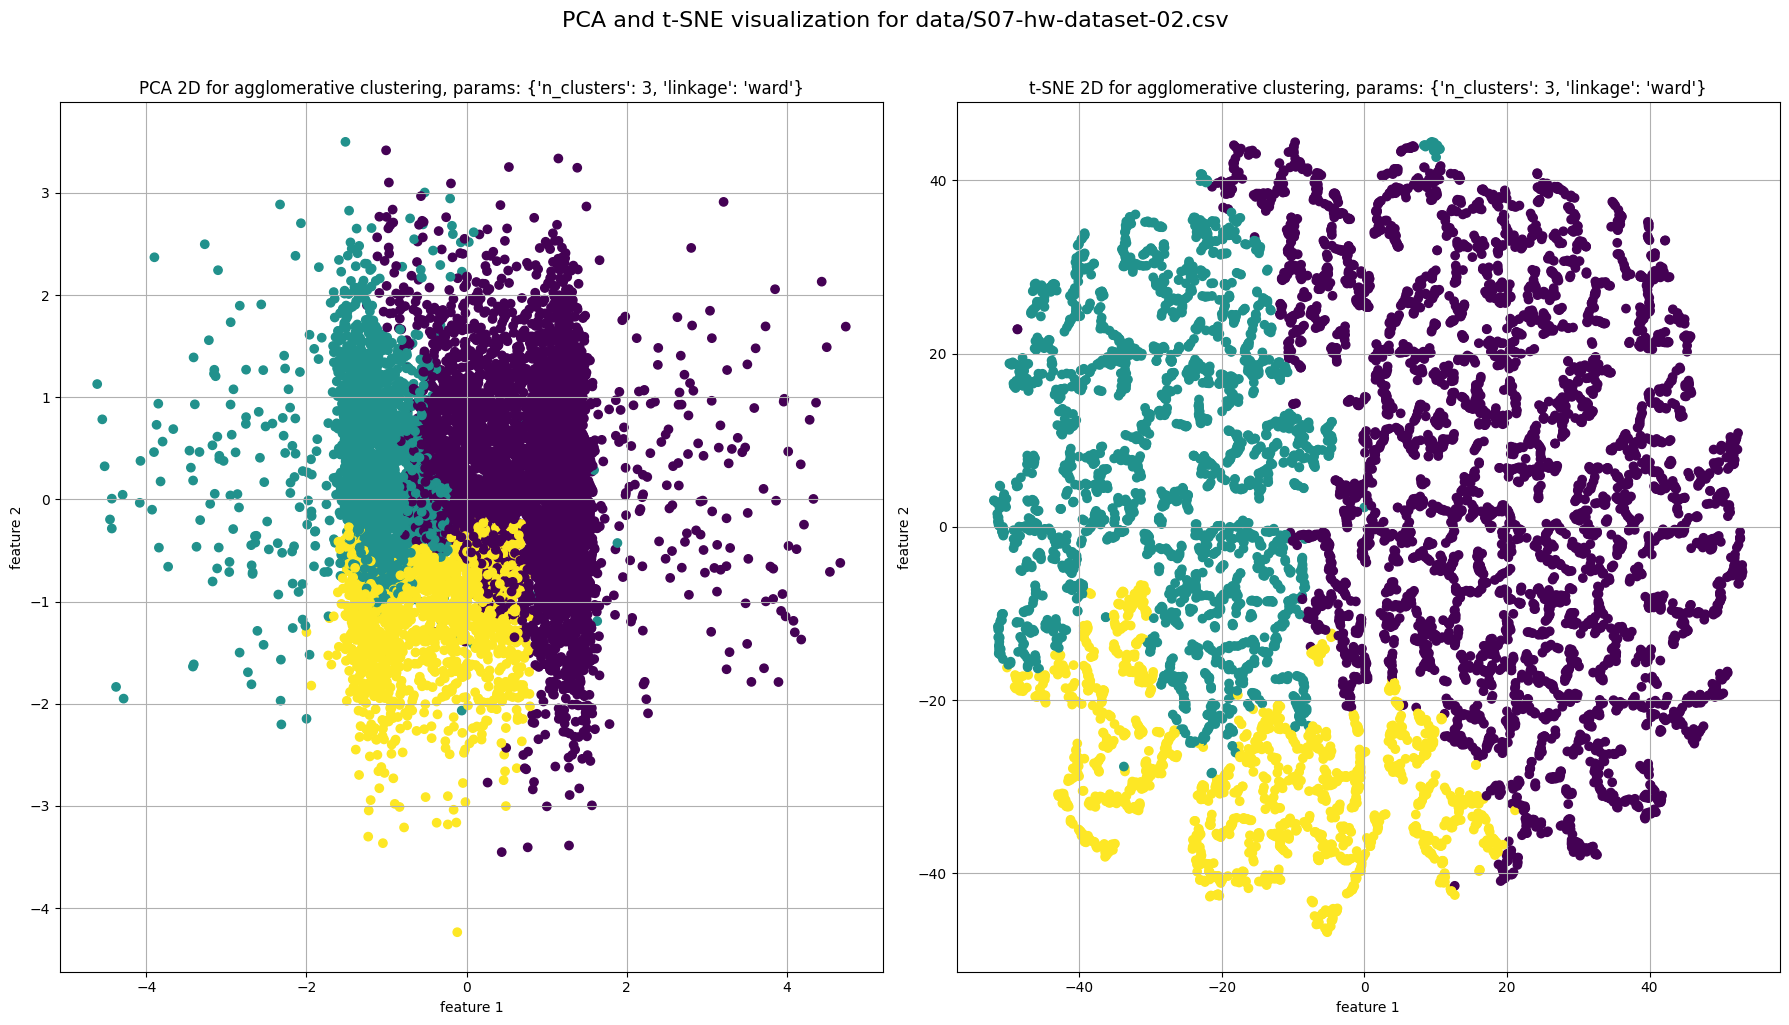

In [27]:
plot_pca_and_tsne(X2_scaled, best_configs[path2])

В линейной проекци на две главные компоненты данные представляют собой густое облако данных с шумом, где кластеры расположились с разных сторон облака.

In [28]:
df3_kmeans = KMeans_grid(X3_scaled, ks, n_init, random_state, path3)
df3_dbscan = DBSCAN_grid(X3_scaled, eps, min_samples, random_state, path3)
df3_agglom = Agglomerative_grid(X3_scaled, ks, linkages, random_state, path3)

In [29]:
metrics_summary[path3] =  df3_kmeans + df3_dbscan + df3_agglom
len(metrics_summary[path3])

106

saved artifacts/figures/kmeans metrics S07-hw-dataset-03.png


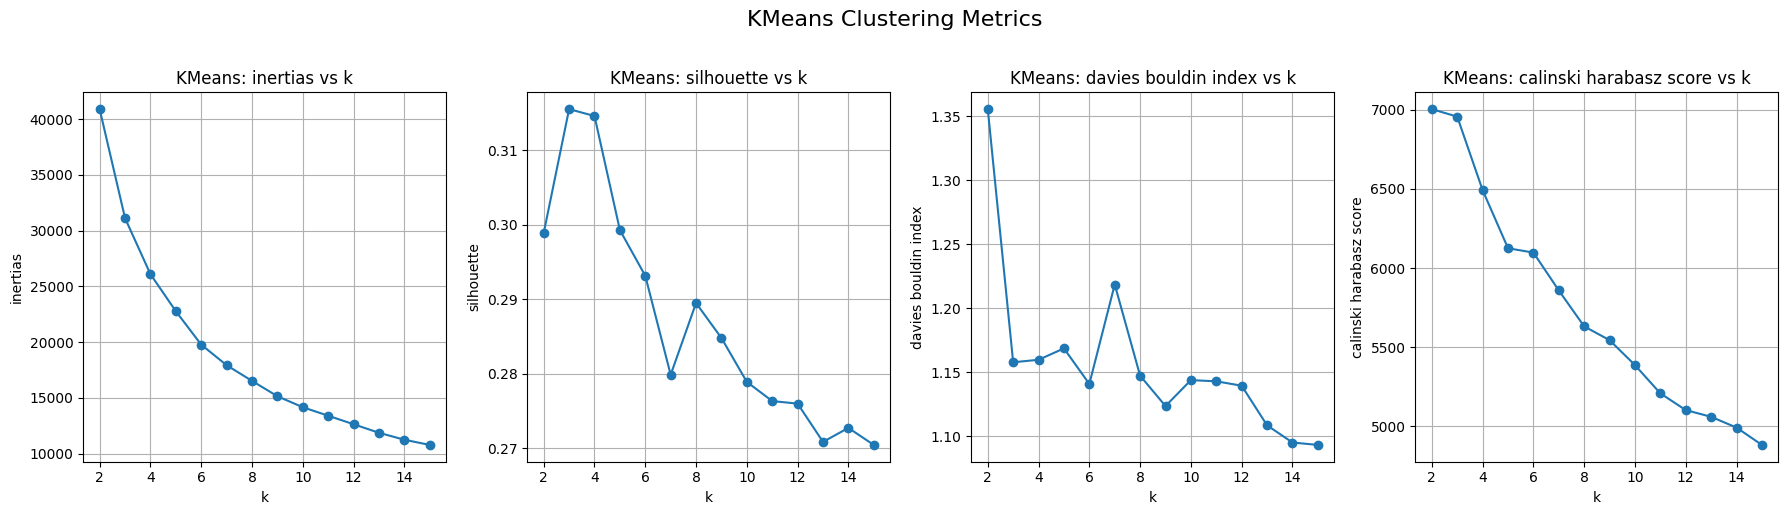

In [30]:
plot_kmeans_metrics_vs_k(df3_kmeans)

saved artifacts/figures/dbscan metrics S07-hw-dataset-03.png


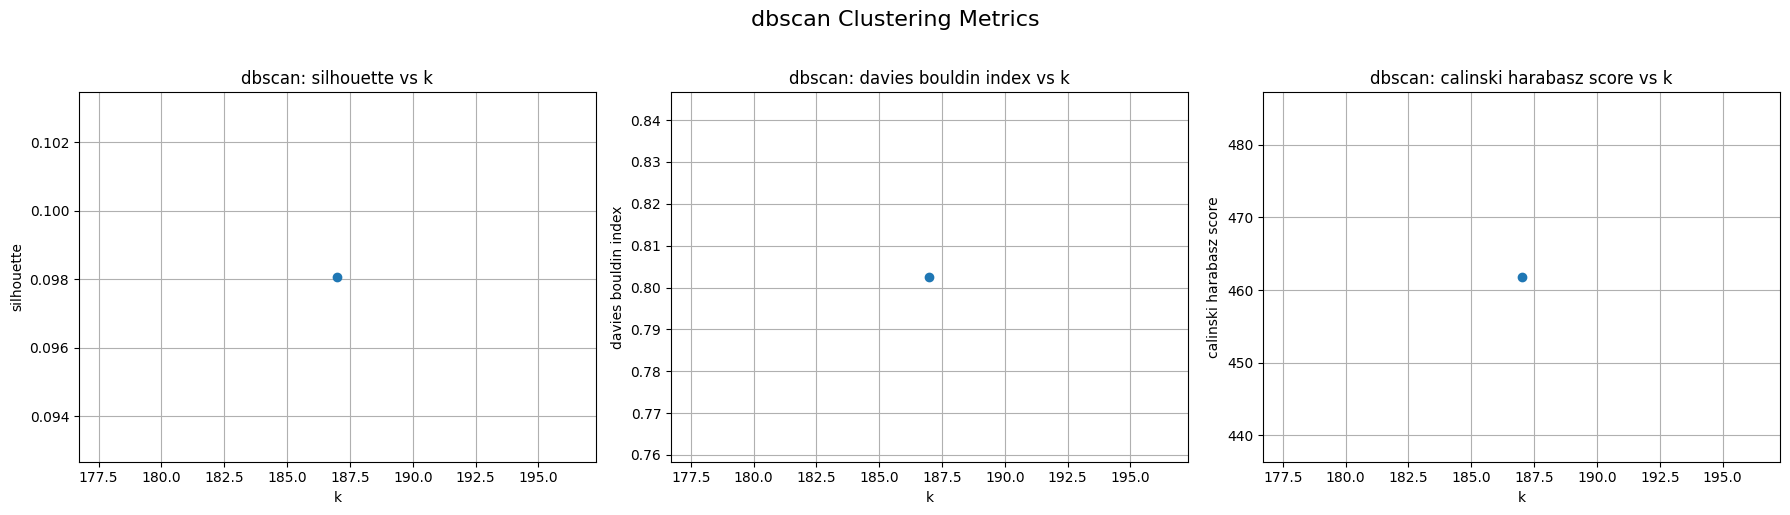

In [31]:
plot_dbscan_metrics(df3_dbscan)

saved artifacts/figures/agglomerative metrics S07-hw-dataset-03.png


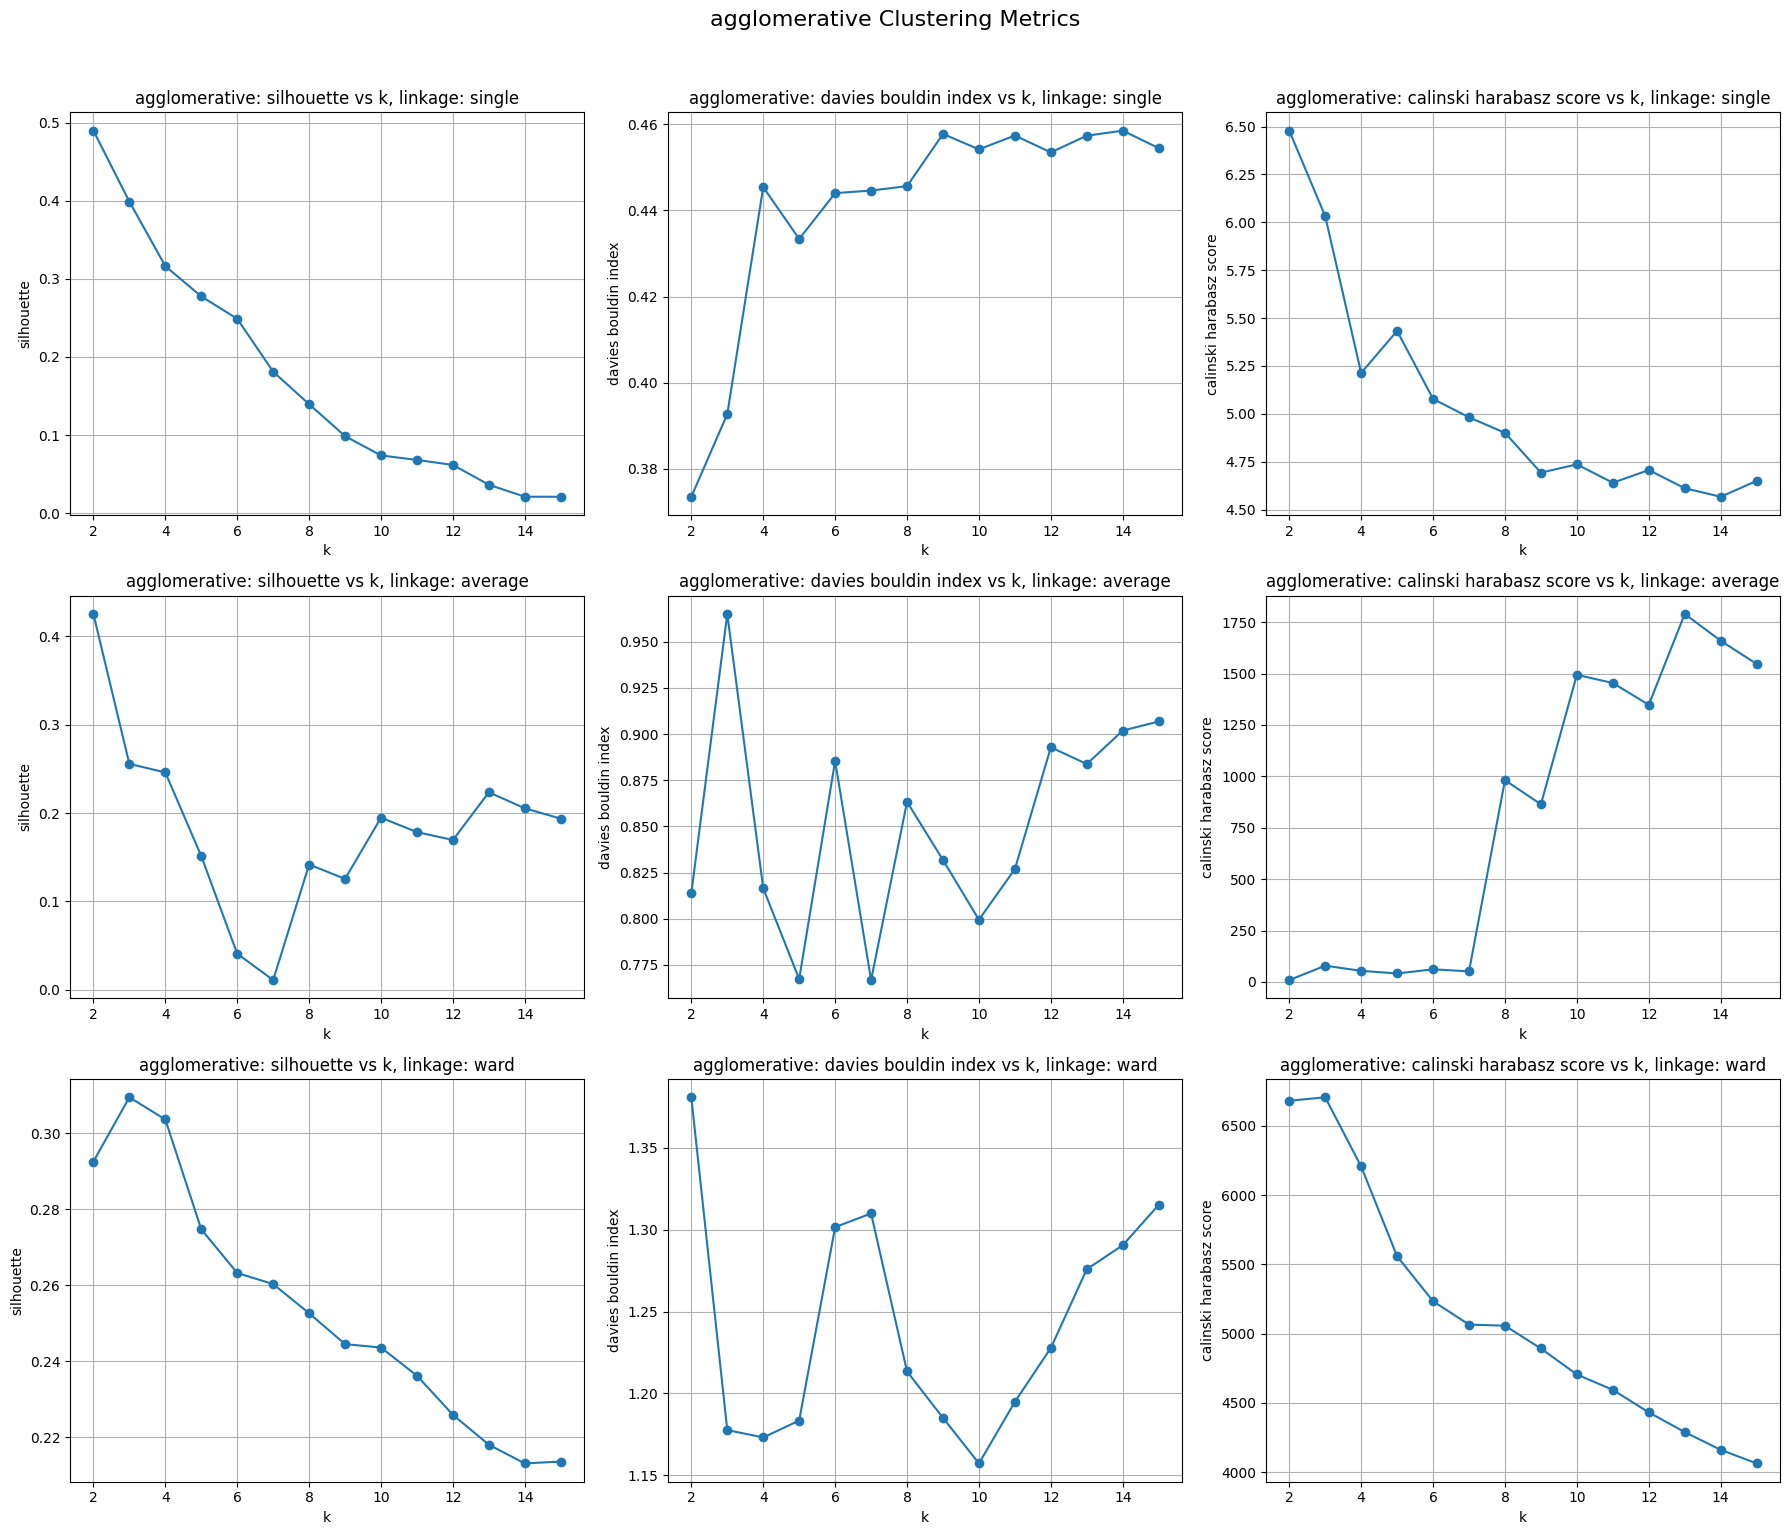

In [32]:
plot_agglom_metrics(df3_agglom)

На третьем датасете DBSCAN все также плохо себя ведет. В качестве лучшего разбиения для этого датасета возьму четыре кластера иерархической кластеризации с linkage = 'ward' (индекс Дэвиса-Боулдина здесь маленький относительно остального количества кластеров с данным параметром).

In [33]:
[x for x in df3_agglom if x['n_clusters'] == 4]

[{'algo': 'agglomerative',
  'data': 'data/S07-hw-dataset-03.csv',
  'params': {'n_clusters': 4, 'linkage': 'single'},
  'labels': array([0, 0, 0, ..., 0, 0, 0], shape=(15000,)),
  'metrics': {'silhouette': 0.31629847028290775,
   'davies_bouldin': 0.44540991293929777,
   'calinski_harabasz': 5.213653671079504},
  'intertia': None,
  'n_clusters': 4,
  'noise_frac': 0.0,
  'random_state': 42},
 {'algo': 'agglomerative',
  'data': 'data/S07-hw-dataset-03.csv',
  'params': {'n_clusters': 4, 'linkage': 'average'},
  'labels': array([0, 0, 0, ..., 0, 0, 0], shape=(15000,)),
  'metrics': {'silhouette': 0.24597991015657278,
   'davies_bouldin': 0.816473693015662,
   'calinski_harabasz': 53.94067477007235},
  'intertia': None,
  'n_clusters': 4,
  'noise_frac': 0.0,
  'random_state': 42},
 {'algo': 'agglomerative',
  'data': 'data/S07-hw-dataset-03.csv',
  'params': {'n_clusters': 4, 'linkage': 'ward'},
  'labels': array([0, 1, 1, ..., 1, 1, 1], shape=(15000,)),
  'metrics': {'silhouette': 0.

In [34]:
best_configs[path3] = [x for x in df3_agglom if x['n_clusters'] == 4 and x['params']['linkage'] == 'ward'][0]
best_configs[path3]

{'algo': 'agglomerative',
 'data': 'data/S07-hw-dataset-03.csv',
 'params': {'n_clusters': 4, 'linkage': 'ward'},
 'labels': array([0, 1, 1, ..., 1, 1, 1], shape=(15000,)),
 'metrics': {'silhouette': 0.3035720503661607,
  'davies_bouldin': 1.1730948913052048,
  'calinski_harabasz': 6206.351567152033},
 'intertia': None,
 'n_clusters': 4,
 'noise_frac': 0.0,
 'random_state': 42}

saved artifacts/figures/pca and tsne S07-hw-dataset-03.png


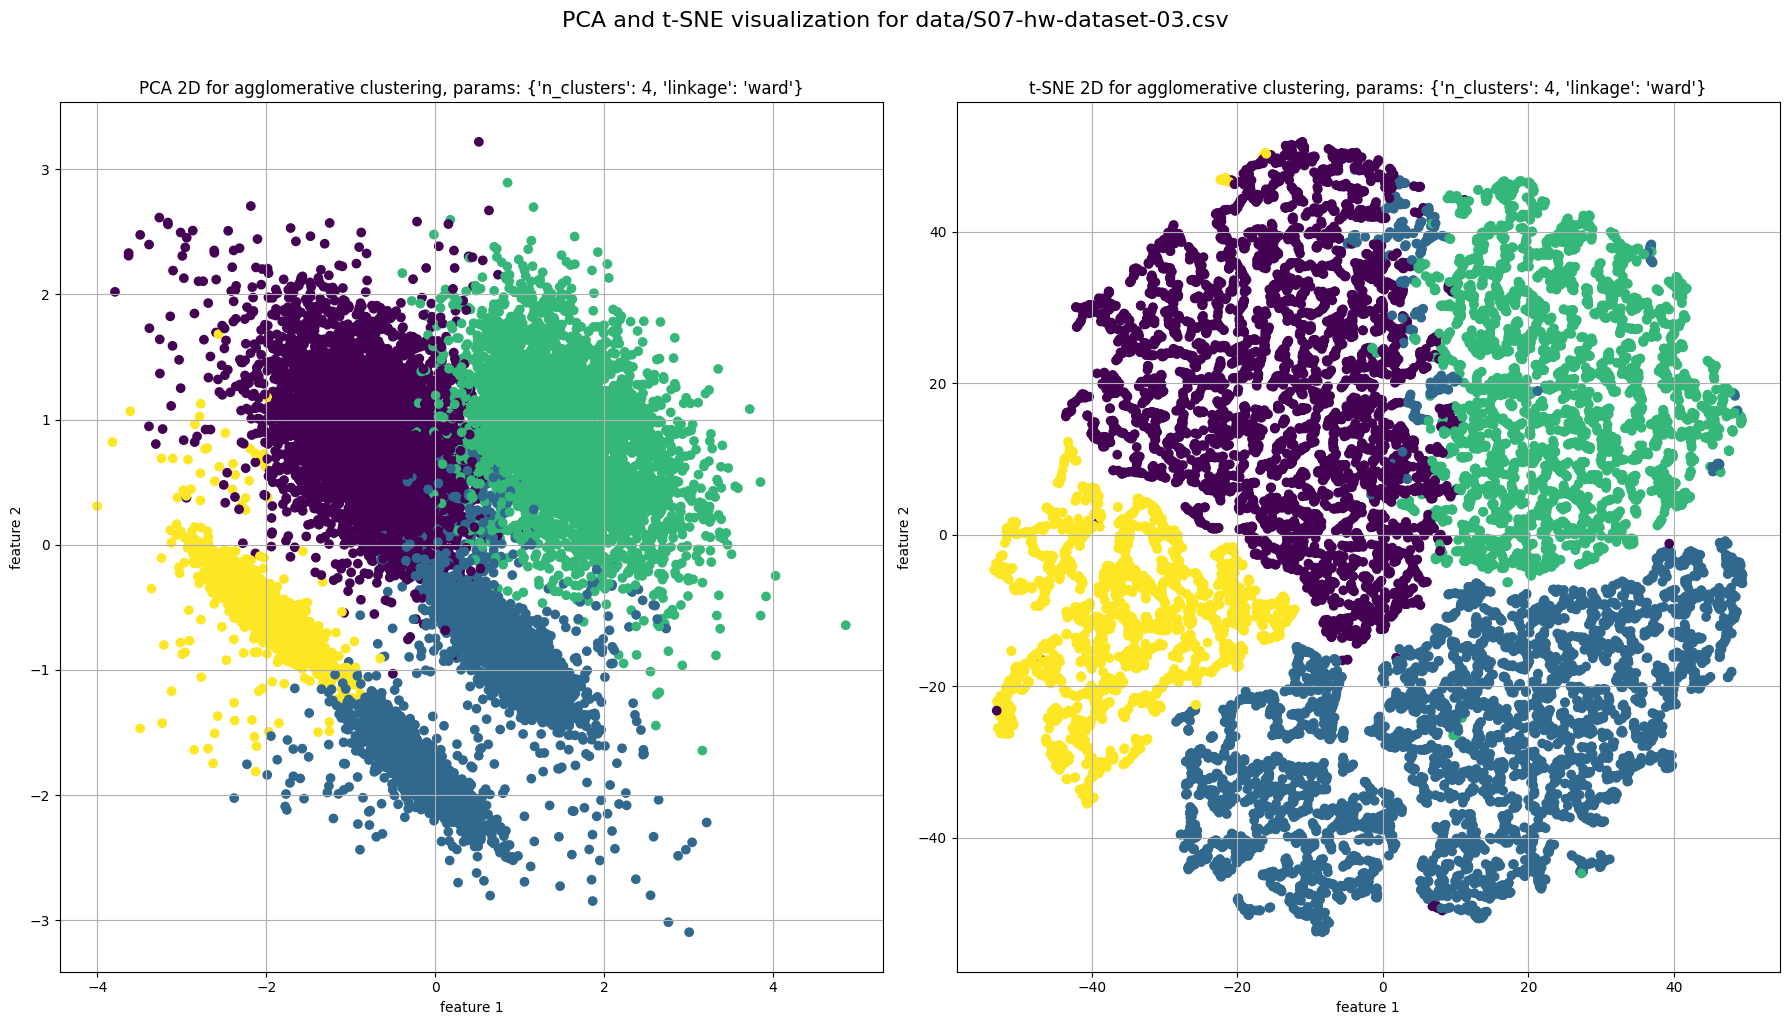

In [35]:
plot_pca_and_tsne(X3_scaled, best_configs[path3])

Тут уже данные можно визуально разделить (опять же, опираясь на проекции), но выбранное разделение также неплохо.

In [36]:
dfs_l = []
for path, X in zip(best_configs, [X1, X2, X3]):
    df = pd.DataFrame(pd.concat((pd.Series(best_configs[path]['labels'], name='label'), X), axis=1))
    grouped = df.groupby('label').mean()
    display(grouped)
    dfs_l.append(grouped)

,f01,f02,f03,f04,f05,f06,f07,f08
label,,,,,,,,
0,-0.070850,-72.187792,-0.042473,65.471313,-10.441769,-8.921313,0.503411,-0.003496
1,17.540764,60.096197,-1.196370,-102.674372,10.074911,29.255953,-0.568951,-0.008659
2,-9.865858,35.891882,0.042855,-1.415771,-0.194153,-5.172739,0.077994,0.016784


,x1,x2,z_noise
label,,,
0,-0.043172,0.638463,1.624930
1,1.179878,-0.357111,2.983235
2,0.927606,0.006715,-9.324201


,x1,x2,f_corr,f_noise
label,,,,
0,-1.180268,4.129274,-1.040252,0.105038
1,2.600587,-3.413277,1.317781,-0.124899
2,7.035212,5.964575,1.235982,-0.058933
3,-6.045939,-2.982972,-1.357420,-0.029786


In [37]:
X = X1_scaled
seeds = np.arange(5)
km_results = []
for seed in seeds:
    model = KMeans(n_clusters=3, n_init=n_init, random_state=seed)
    labels = model.fit_predict(X)
    km_results.append(labels)
print(len(km_results))

ARIs = []
for i in range(len(seeds) - 1):
    for k in range(i + 1, len(seeds)):
        ARIs.append((i, k, float(adjusted_rand_score(km_results[i], km_results[k]))))

mean = np.mean([ARIs[i][2] for i in seeds])
std = np.std([ARIs[i][2] for i in seeds])

print('mean:', mean)
print('std:', std)

ARIs

5
mean: 1.0
std: 0.0


[(0, 1, 1.0),
 (0, 2, 1.0),
 (0, 3, 1.0),
 (0, 4, 1.0),
 (1, 2, 1.0),
 (1, 3, 1.0),
 (1, 4, 1.0),
 (2, 3, 1.0),
 (2, 4, 1.0),
 (3, 4, 1.0)]

KMeans проверку на устойчивость прошел успешно, метки кластеров идентичны вне зависимости от seed.

In [57]:
for path in metrics_summary:
    for sol in metrics_summary[path]:
        sol['labels'] = [int(i) for i in sol['labels']]

for path, sample_id in zip(best_configs.keys(), [sample_id1, sample_id2, sample_id3]):
    best_configs[path]['labels'] = [int(i) for i in best_configs[path]['labels']]
    save_labels(best_configs[path], sample_id)
    

ms_path = 'artifacts/metrics_summary.json'
bc_path = 'artifacts/best_configs.json'

save_json(metrics_summary, ms_path)
save_json(best_configs, bc_path)

saved artifacts/labels_hw07_ds1.csv
saved artifacts/labels_hw07_ds2.csv
saved artifacts/labels_hw07_ds3.csv
saved artifacts/metrics_summary.json
saved artifacts/best_configs.json
